<font size=+2><b>Описание проекта</b></font><br>


Перед нами информация о некотором интернет-магазине, который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам предстоит выявить закономерности, определяющие успешность игры, что бы спланирова рекламные компании, сделав ставку на потенциально популярный продукт.


Изучим данные, избавимся от дубликатов, пропусков - по возможности, приведем все в читаемый и аккуратный вид, что бы наше исследование было максимально результативным и понятным.
Для удобства, декомпозируем нашу работу на несколько пунктов:
- Предобработаем данные;
- Проведем исследовательский анализ данных;
- Составим портрет пользователя каждого региона;
- Проверим интересующие нас гипотезы;
- Дадим нашу рекомендацию и составим общий вывод, на основе проделанной работы.

## Загрузка и ознакомление с данными

In [1]:
import pandas as pd
pd.set_option('chained_assignment', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
data = pd.read_csv('/datasets/games.csv')
data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [3]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## Подготовьте данные

In [5]:
data = data.rename(columns=lambda x: x.lower())

Приведем столбцы year_of_release и user_score к нужному типу данных

In [6]:
data['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [7]:
display(data['year_of_release'].isna().sum())

269

Всего 269 пропусков, от них можно избавиться, тем более - никакого логичного заполнения этих данных мы не найдем.

In [8]:
data = data.dropna(subset=['year_of_release'])

In [9]:
data['year_of_release'] = data['year_of_release'].astype('int')

In [10]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Заменим значения tbd на Nan, т.к. оно не несет за собой никакой полезной для нас информации. Также, это значение мешает нам преобразовать столбец к нужному типу данных - float, в дальшейшем с таким типой будект удобнее работать.

In [11]:
data.loc[data['user_score'] == 'tbd','user_score'] = np.nan
data['user_score'] = data['user_score'].astype('float')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Проверим пропуски в данных

In [13]:
data.isna().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8463
user_score         8983
rating             6678
dtype: int64

Удалим пропуски в name и genre

In [14]:
data = data.dropna(subset=['name', 'genre'])

In [15]:
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [16]:
data['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

Думаю, что оценки пока лучше не трогать, т.к. мы достоверно не можем заменить пропуски в этих столбцах, ведь даже оценки одних и тех же игр на разных платформах могут отличаться.

In [17]:
def sales(row):
    res = row['na_sales'] + row['eu_sales'] + row['jp_sales'] + row['other_sales']
    return res

data['total_sale'] = data.apply(sales, axis=1)
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sale
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


Проверим данные на дубликаты.

In [18]:
display(data.loc[data.duplicated(subset=['name', 'platform', 'year_of_release'], keep=False)])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sale
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E,2.56
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E,0.01


In [19]:
#удаляем дубликаты
data = data.drop_duplicates(subset=['name', 'platform', 'year_of_release'], keep='first')

Логичное объяснение пропусков, можно предположить только в столбце rating, т.к. система ESRB была придумана только в 1994 году. А также, вероятно, что есть и альтернативные ситемы простановки рейтинга. Пропуски в столбцах 'name', 'platform', 'year_of_release' и 'genre' вероятнее всего образованы какими-либо недостатками системы сбора предоставленной информации.

Entertainment Software Rating Board (ESRB) — негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде. ESRB была основана в 1994 году ассоциацией Interactive Digital Software Association (современное название — «Entertainment Software Association»). К началу 2003 года рейтинги ESRB получили более 8000 продуктов от 350 издателей.

Рейтинги K-A ("Kids to Adults") и EC — Early Childhood - ныне обозначаются Е, так что заменим эти значения

In [21]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [22]:
data.loc[data['rating'] == 'K-A', 'rating'] = 'E'
data.loc[data['rating'] == 'EC', 'rating'] = 'E'

С учетом того, что ESRB была основана в 1994 году, а выгрузке присутствуют игры с 1980 года, можно предположить, что отсутствие рейтинга - это нормально

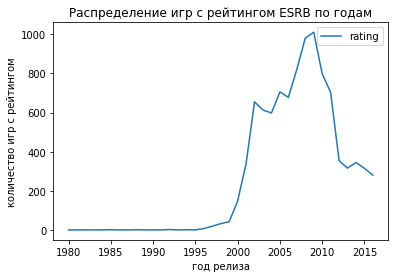

In [23]:
plots = data.groupby('year_of_release')['rating'].count().reset_index().plot(x='year_of_release')
plt.xlabel('год релиза')
plt.ylabel('количество игр с рейтингом')
plt.title('Распределение игр с рейтингом ESRB по годам')
plt.show()

Да, как мы видим на графике, количество игр, которым был присвоен рейтинг увеличиваетя после 1995 года.

Пропуски заполним соответсвующим значением "unrated".

In [24]:
data['rating'] = data['rating'].fillna('unrated')

Итак, мы успешно завершили шаг предобработки данных, в рамках этого:
- привели все названия столбцов таблицы к нижнему регистру, 
- избавились от 269 пропусков в столбце 'year_of_release' удалив их,
- привели данные столбца 'year_of_release' к типу int,
- заменили значения tbd на Nan в столбце 'user_score', т.к. оно не несет за собой никакой полезной для нас информации, и преобразовали столбец к типу float,
- удалили по 2 пропуска в столбцах 'name' и 'genre',
- создали столбец 'total_sale', который собирает в себя информацию о сумме продаж по всем регионам,
- удалил дубликаты в столбцах 'name', 'platform', 'year_of_release',
- заполнили пропуски в столбце 'rating' значением "unrated"

## Проведите исследовательский анализ данных

##### Релизы игр по годам

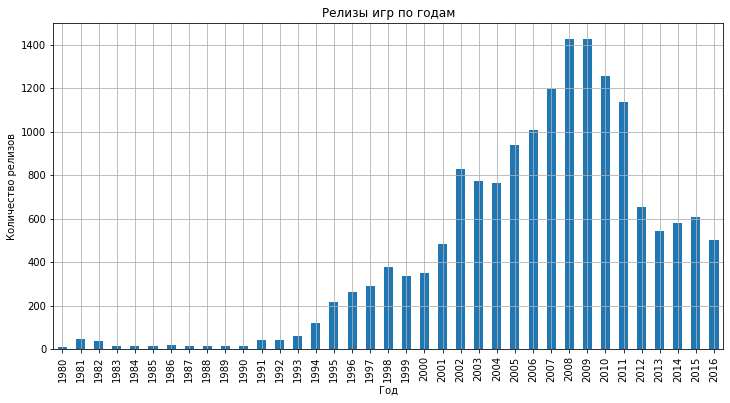

In [26]:
data.groupby('year_of_release')['year_of_release'].count().plot(kind='bar', figsize=(12,6), grid=True)
plt.title('Релизы игр по годам')
plt.ylabel('Количество релизов')
plt.xlabel('Год')
plt.show()

Исходя из графика, мы можем отбросить данные по играм, выпущенным до 1995 года.

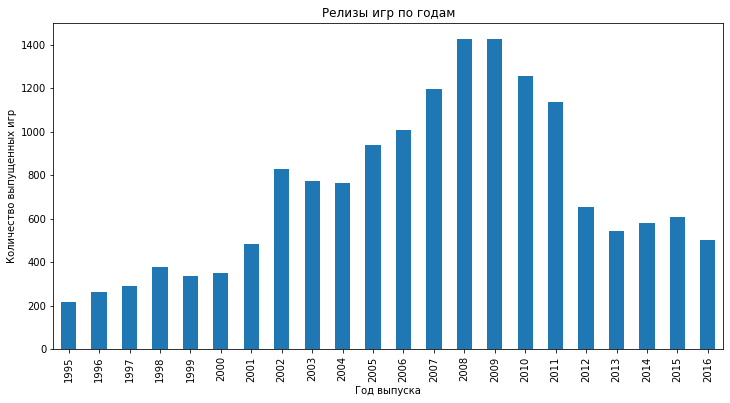

In [27]:
data.query('year_of_release > 1994').groupby('year_of_release')['year_of_release'].count().plot(kind='bar', figsize=(12,6))
plt.title('Релизы игр по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Количество выпущенных игр')
plt.show()

##### Суммарные продажи по платформам

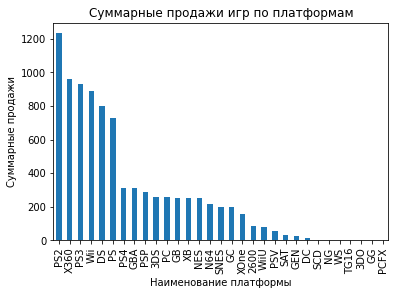

In [28]:
data.groupby('platform')['total_sale'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Суммарные продажи игр по платформам')
plt.xlabel('Наименование платформы')
plt.ylabel('Суммарные продажи')
plt.show()

Соберем таблицу из топ 6 самых платформ, с самыми высокими продажами.

In [29]:
top_platform = data[(data['platform'] == 'PS2')|(data['platform'] == 'X360')|(data['platform'] == 'PS3')|(data['platform'] == 'Wii')|(data['platform'] == 'DS')|(data['platform'] == 'PS')]
top_platform

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sale
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16700,Mezase!! Tsuri Master DS,DS,2009,Sports,0.00,0.00,0.01,0.00,NaN,NaN,unrated,0.01
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.00,0.00,NaN,NaN,E,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,NaN,NaN,unrated,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unrated,0.01


In [30]:
# Комментарий ревьюера
temp = data.copy() 
list(temp.groupby('platform')['total_sale'].sum().sort_values(ascending=False).index[:6])

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

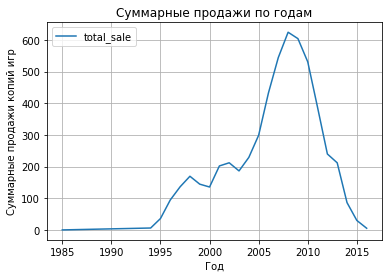

In [31]:
top_platform.groupby('year_of_release').agg({'total_sale':'sum'}).plot(grid=True)
plt.ylabel('Cуммарные продажи копий игр')
plt.xlabel('Год')
plt.title('Суммарные продажи по годам')
plt.show()

По графику видно, что с 2008 года рынок видеоигр очень сильно упал, практически до уровня 1990 годов.

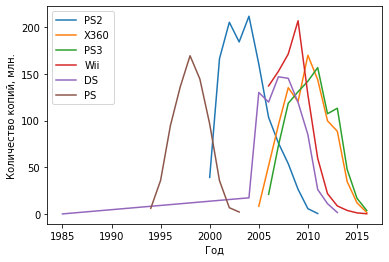

In [32]:
plt.plot(top_platform[top_platform['platform'] == 'PS2'].groupby('year_of_release').agg({'total_sale':'sum'}), label='PS2')
plt.plot(top_platform[top_platform['platform'] == 'X360'].groupby('year_of_release').agg({'total_sale':'sum'}), label='X360')
plt.plot(top_platform[top_platform['platform'] == 'PS3'].groupby('year_of_release').agg({'total_sale':'sum'}), label='PS3')
plt.plot(top_platform[top_platform['platform'] == 'Wii'].groupby('year_of_release').agg({'total_sale':'sum'}), label='Wii')
plt.plot(top_platform[top_platform['platform'] == 'DS'].groupby('year_of_release').agg({'total_sale':'sum'}), label='DS')
plt.plot(top_platform[top_platform['platform'] == 'PS'].groupby('year_of_release').agg({'total_sale':'sum'}), label='PS')
plt.ylabel('Количество копий, млн.')
plt.xlabel('Год')
plt.legend()
plt.show()

Заметно, что цикл появления новых и исчезновения старых платформ около 10 лет. Для прогнозирования подаж на следующий год нужно использовать данные за последние 5-ть лет: платформы, продажи которых растут в течение этого срока, являются наиболее перспективными (т.к. ближайшие пару лет они будут расти + даже после спада продаж, они все еще будут приносить хороший доход).

Давайте посмотрим данные за 2012-2016 гг., чтобы понять, какие платформы окажутся в лидерах.

In [34]:
data_sales = data.query('year_of_release >= 2012').pivot_table(
    index = 'year_of_release', 
    columns = 'platform',
    values = 'total_sale', 
    aggfunc = 'sum')
data_sales

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2012,51.36,11.01,23.22,107.35,NaN,7.69,16.19,21.71,17.56,99.74,NaN
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


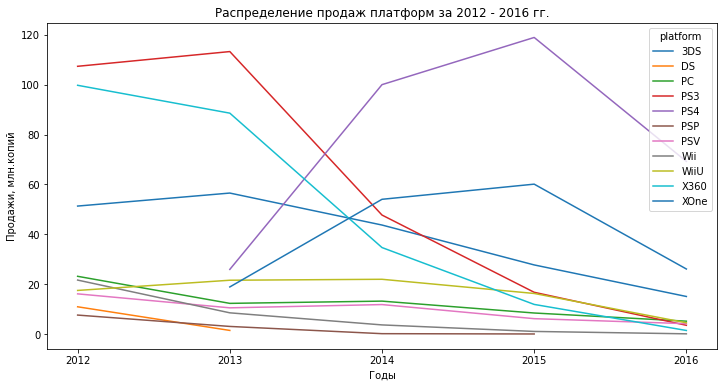

In [35]:
graf = data_sales.plot(xticks=data_sales.index,figsize=(12,6))
ylab = graf.set_ylabel('Продажи, млн.копий')
xlab = graf.set_xlabel('Годы')
plt.title('Распределение продаж платформ за 2012 - 2016 гг.')
plt.show()   

Самыми потенциально прибыльными платформами являются Sony PlayStation 4 и Xbox One. Какое-то время будут актуальны игры для платформ Nintendo 3DS, Wii U, Xbox 360 и PlayStation 3, и будут приносить небольшой доход. Остальные платформы уже отжили свое, и вряд ли будут приносить деньги.

In [36]:
new_top = data.query('year_of_release >= 2012')
new_top

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sale
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unrated,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unrated,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unrated,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,unrated,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unrated,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unrated,0.01


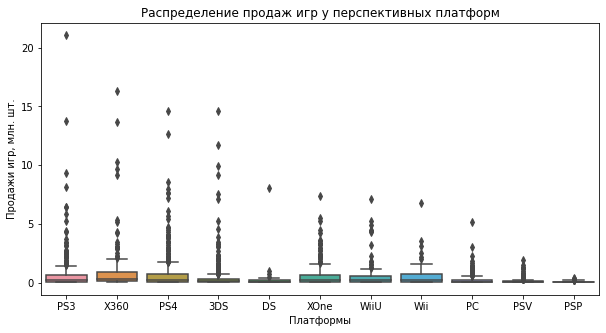

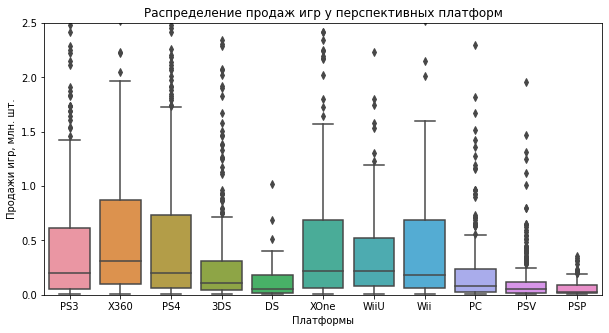

In [37]:
plt.figure(figsize=(10,5))

ax = sns.boxplot(x='platform', y='total_sale', data=new_top)
ax.set_ylabel('Продажи игр, млн. шт.')
ax.set_xlabel('Платформы')
ax.set_title('Распределение продаж игр у перспективных платформ')
plt.show()

plt.figure(figsize=(10,5))

ax = sns.boxplot(x='platform', y='total_sale', data=new_top)
ax.set_ylim(0, 2.5)
ax.set_ylabel('Продажи игр, млн. шт.')
ax.set_xlabel('Платформы')
ax.set_title('Распределение продаж игр у перспективных платформ')
plt.show()

Видно, что медианы сдвинуты к нижним значениям, значит, большое количество выпускаемых игр продается далеко не так, как хотелось бы. Однако, можно увидеть и большое количество сильно выбивающихся значений, которые далеко за медиаными значениями.

##### Влияние отзывов на продажи

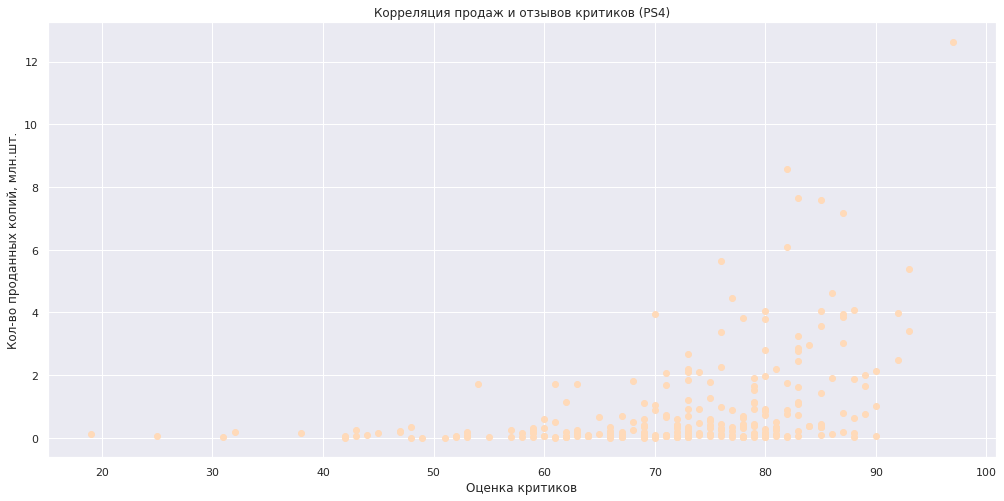

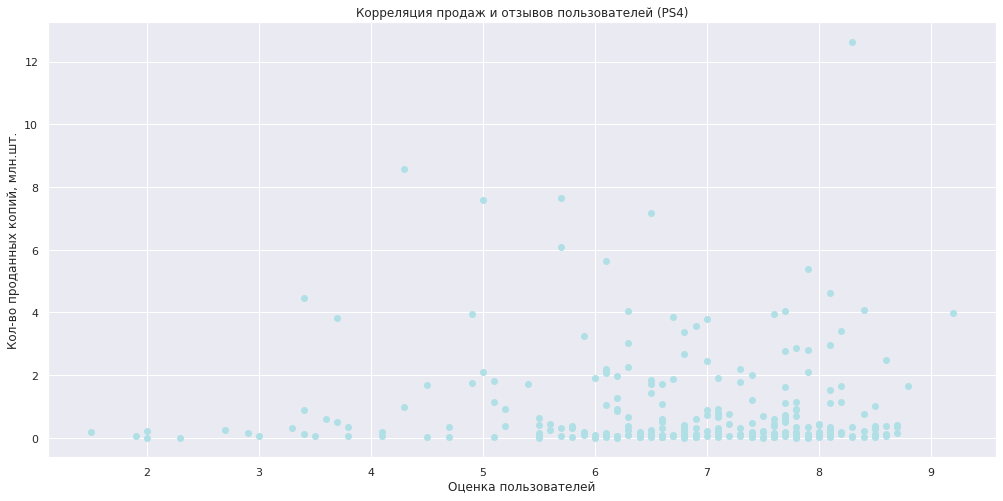

Корреляция продаж и отзывов критиков для PS4 :  0.41
Корреляция продаж и отзывов пользователей для PS4 :  -0.03



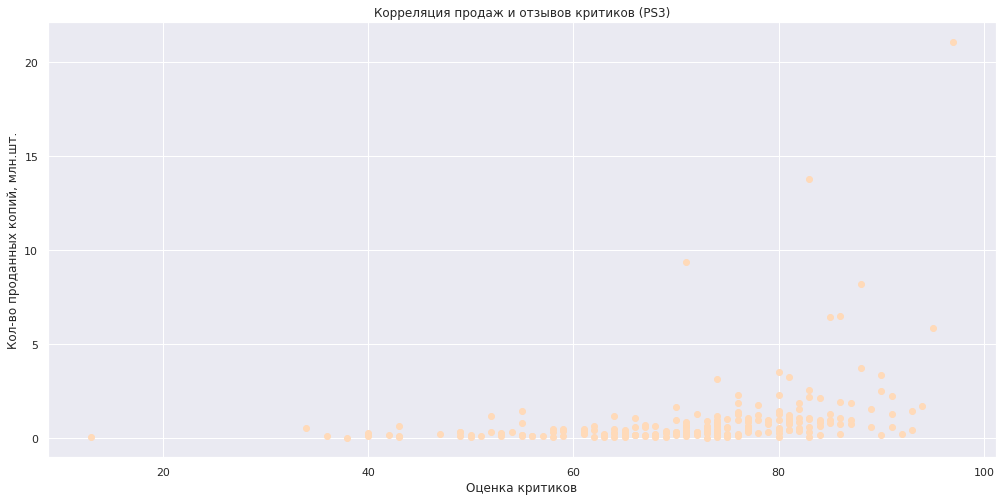

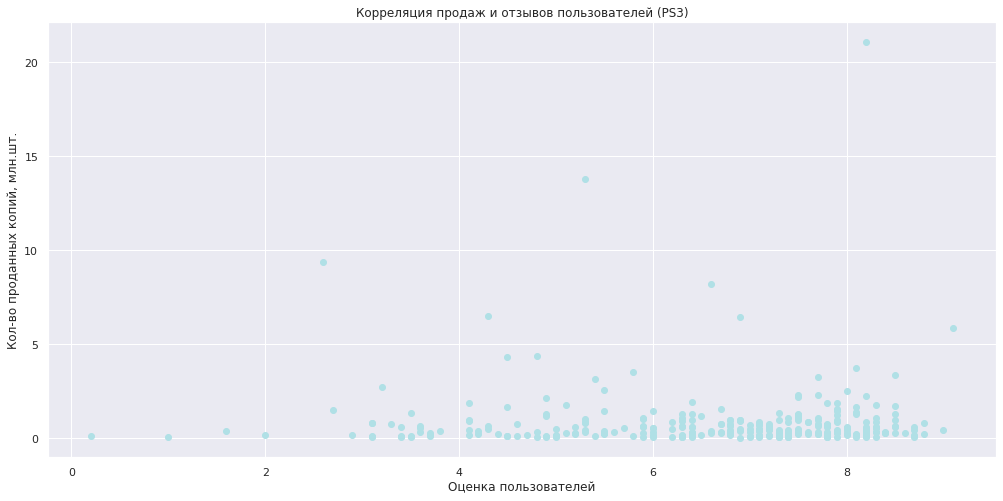

Корреляция продаж и отзывов критиков для PS3 :  0.33
Корреляция продаж и отзывов пользователей для PS3 :  -0.01



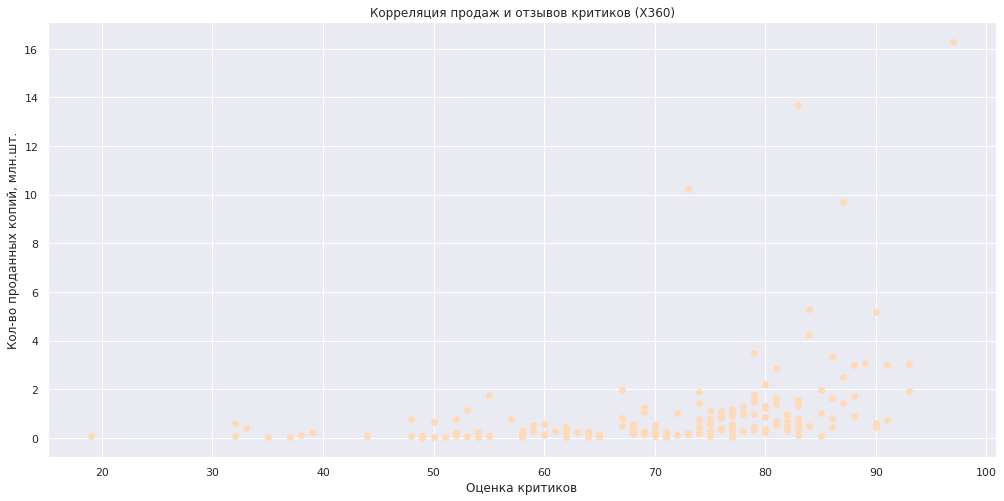

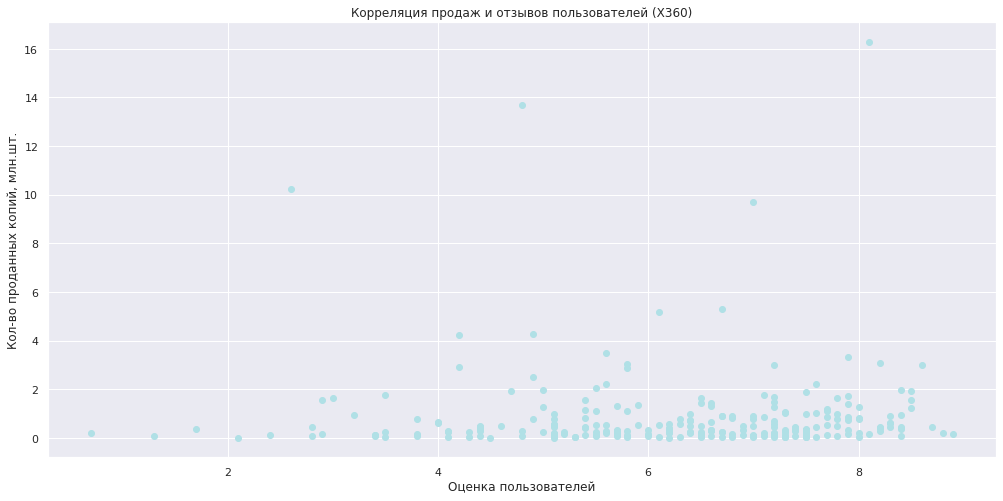

Корреляция продаж и отзывов критиков для X360 :  0.36
Корреляция продаж и отзывов пользователей для X360 :  0.01



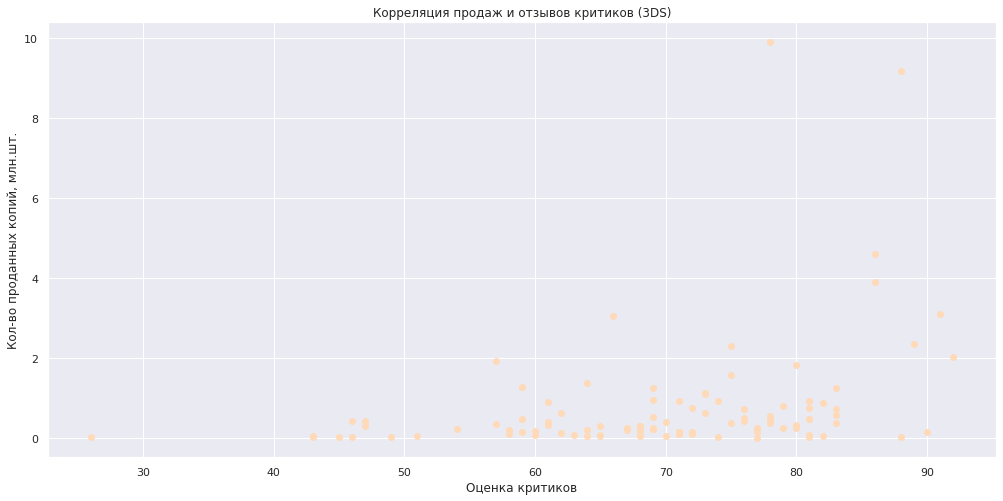

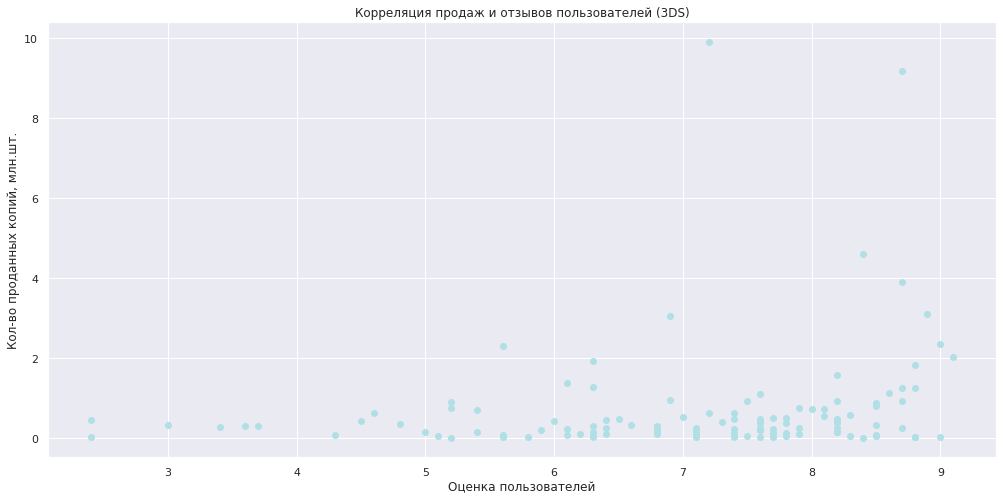

Корреляция продаж и отзывов критиков для 3DS :  0.32
Корреляция продаж и отзывов пользователей для 3DS :  0.2



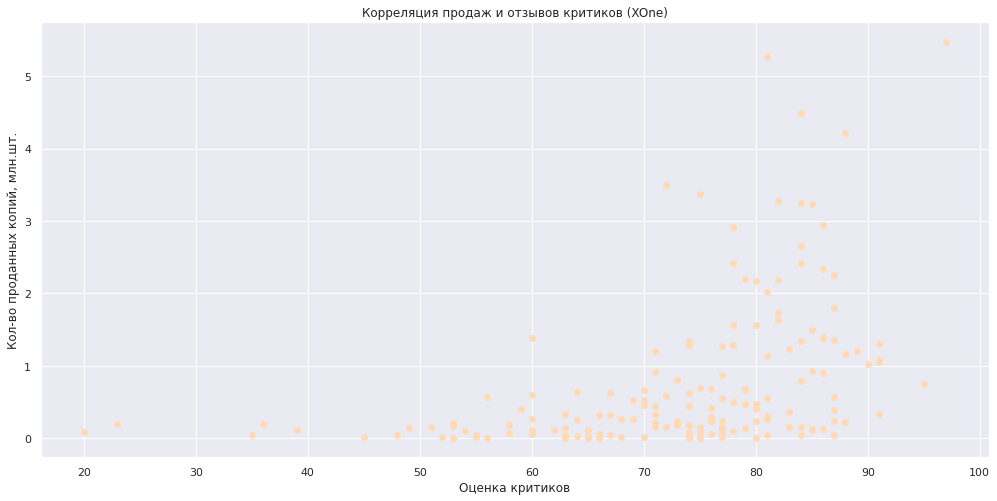

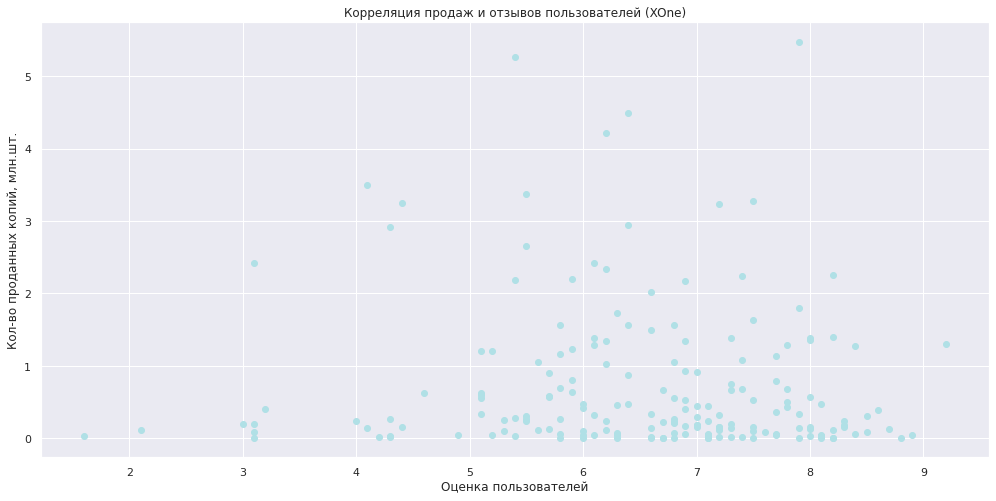

Корреляция продаж и отзывов критиков для XOne :  0.42
Корреляция продаж и отзывов пользователей для XOne :  -0.07



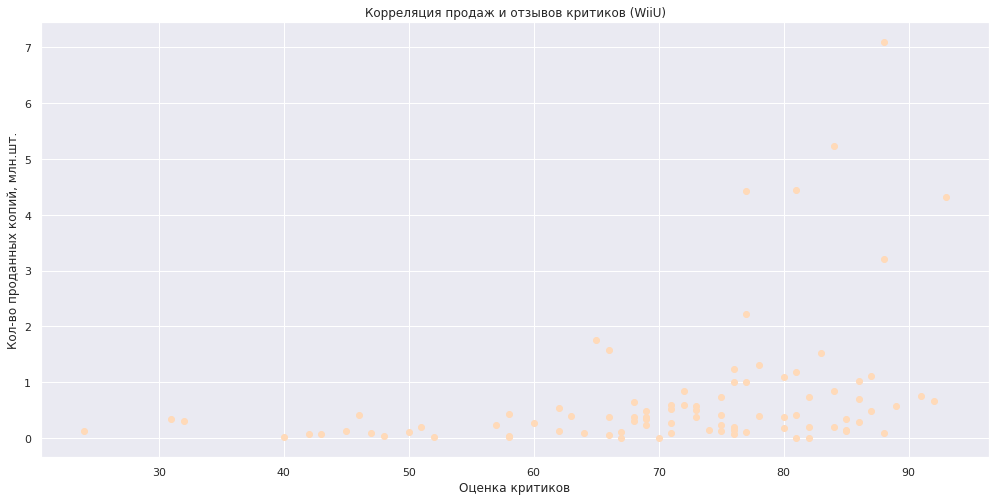

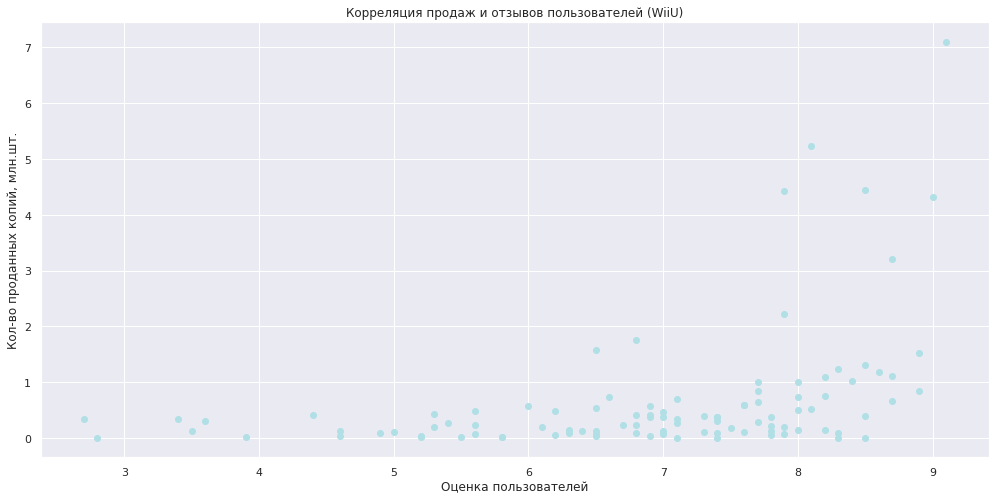

Корреляция продаж и отзывов критиков для WiiU :  0.35
Корреляция продаж и отзывов пользователей для WiiU :  0.4



In [51]:
top_consoles = list(new_top.groupby('platform')['total_sale'].sum().sort_values(ascending=False).index[:6])

for console in top_consoles:
    res = new_top[new_top['platform'] == console]
    plt.subplots(figsize=(17,8))
    plt.title(f'Корреляция продаж и отзывов критиков ({console})')         
    plt.ylabel('Кол-во проданных копий, млн.шт.')
    plt.xlabel('Оценка критиков')
    plt.scatter(x=res['critic_score'],y=res['total_sale'], color='peachpuff' )
    plt.show()
    
    plt.subplots(figsize=(17,8))
    plt.title(f'Корреляция продаж и отзывов пользователей ({console})')        
    plt.ylabel('Кол-во проданных копий, млн.шт.')
    plt.xlabel('Оценка пользователей')
    plt.scatter(x=res['user_score'],y=res['total_sale'], color='powderblue')
    plt.show()
         
    print('Корреляция продаж и отзывов критиков для',console,': ',
          res['critic_score'].corr(res['total_sale']).round(2))
    print('Корреляция продаж и отзывов пользователей для',console,': ',
          res['user_score'].corr(res['total_sale']).round(2))
    print()

Расчет и визуализация зависимости продаж и отзывов критиков/пользователей по топ 6 платформам -'PS4', 'PS3', 'X360', '3DS', 'XOne', 'WiiU', дают нам понять, что корреляция между исследуемыми выличинами очень слабая. 
Интересно, что азиатские платформы WiiU и 3DS имеют самую высокую корреляцию отзывов пользователей с общим количеством продаж среди выбраных платформ. 

#####  Общее распределение игр по жанрам

In [53]:
new_top['genre'].value_counts()

Action          1031
Role-Playing     370
Adventure        302
Sports           267
Shooter          235
Misc             192
Racing           115
Fighting         109
Platform          85
Simulation        80
Strategy          71
Puzzle            28
Name: genre, dtype: int64

Явным лидером являются игры жанра экшен.
Посмотрим на общую доходность жанров по регионам.

In [54]:
new_top.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales', 'total_sale']].sum().sort_values(by='total_sale', ascending=False)

,na_sales,eu_sales,jp_sales,total_sale
genre,,,,
Action,177.84,159.34,52.80,441.12
Shooter,144.77,113.47,9.23,304.73
Role-Playing,64.00,48.53,65.44,192.80
Sports,81.53,69.08,8.01,181.06
Misc,38.19,26.32,12.86,85.04
Platform,25.38,21.41,8.63,61.00
Racing,17.22,27.29,2.50,53.50
Fighting,19.79,10.79,9.44,44.49
Simulation,7.97,14.55,10.41,35.12


Самыми продаваемыми жанрами в играх являются Action, Shooter и Sports. А вот самые низкие продажи у игр в жанрах Adventure, Strategy и Puzzle.

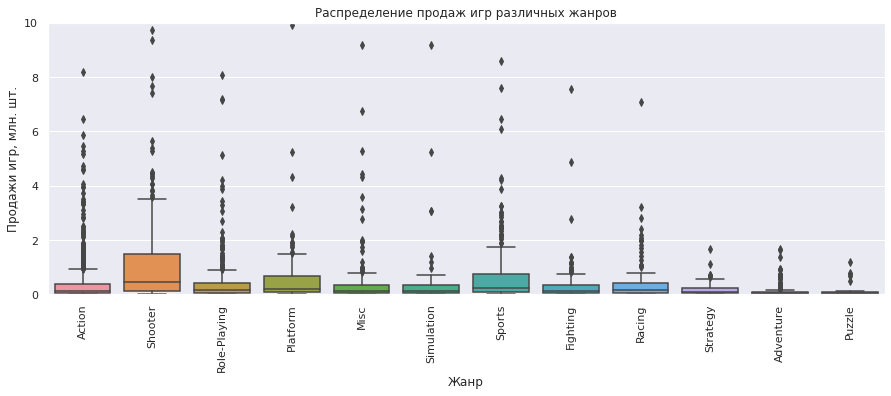

In [57]:
plt.figure(figsize=(15,5))

ax = sns.boxplot(x='genre', y='total_sale', data=new_top)
ax.set_ylim(0, 10)
ax.set_ylabel('Продажи игр, млн. шт.')
ax.set_xlabel('Жанр')
plt.xticks(rotation=90)
ax.set_title('Распределение продаж игр различных жанров')
plt.show()

## Составьте портрет пользователя каждого региона

##### Самые популярные платформы (топ-5)

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Топ платформ надо определять не заданным списком, что было сделано при фильтрации по платформам датасета актуального периода, а по максимальным продажам каждого региона. В разных регионах свой топ платформ.</font>

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='Red'>🛠 Ошибка не исправлена, топ определяется по общим продажам, а не по каждому региону отдельно.</font>

In [58]:
top_5 = new_top.pivot_table(
    index = 'platform',
    values = ['na_sales', 'eu_sales', 'jp_sales'],
    aggfunc =  'sum'
).apply(
    lambda col: col / col.sum(), 
    axis=0
).style.format("{:.1%}")
top_5

,eu_sales,jp_sales,na_sales
platform,,,
3DS,8.4%,45.6%,9.4%
DS,0.7%,1.9%,0.8%
PC,7.5%,0.0%,3.2%
PS3,21.1%,18.3%,17.5%
PS4,27.8%,8.3%,18.4%
PSP,0.1%,5.4%,0.0%
PSV,2.2%,10.9%,1.9%
Wii,2.4%,1.8%,3.0%
WiiU,5.0%,6.8%,6.4%


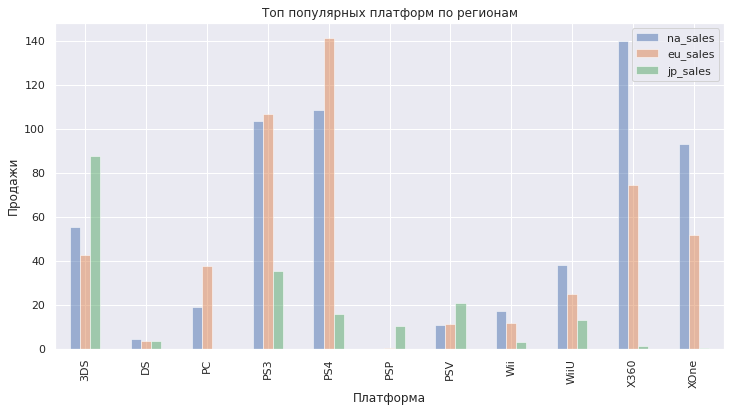

In [59]:
new_top.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum().plot(kind='bar', figsize=(12,6), alpha=0.5, grid=True)
plt.title('Топ популярных платформ по регионам')
plt.ylabel('Продажи')
plt.xlabel('Платформа')
plt.show()

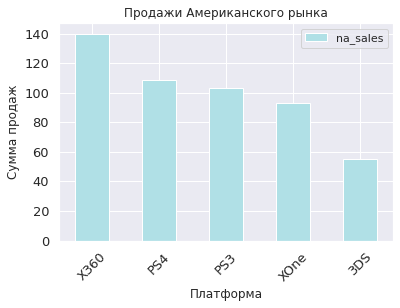

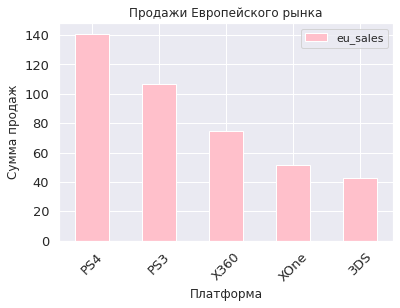

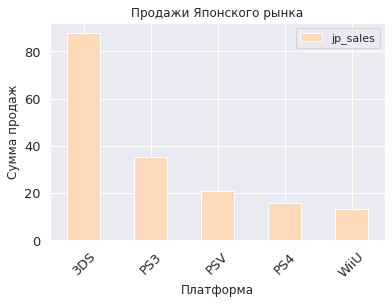

In [60]:
new_top.groupby('platform').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False)[:5].plot(kind='bar', color='powderblue', fontsize=13, rot=45)
plt.title('Продажи Американского рынка')
plt.xlabel('Платформа')
plt.ylabel('Сумма продаж')
plt.show()

new_top.groupby('platform').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False)[:5].plot(kind='bar', color='pink', fontsize=13, rot=45)
plt.title('Продажи Европейского рынка')
plt.xlabel('Платформа')
plt.ylabel('Сумма продаж')
plt.show()

new_top.groupby('platform').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False)[:5].plot(kind='bar', color='peachpuff', fontsize=13, rot=45)
plt.title('Продажи Японского рынка')
plt.xlabel('Платформа')
plt.ylabel('Сумма продаж')
plt.show()

Наши расчеты говорят, что Европейский регион предпочитает играть на PS, 49% пользуются PS3 либо PS4, далее следуют приставки от Microsoft (в сумме почти 25%). А вот Япония, делает 45% продаж только на 3DS и почти 27% отдают PS3 и PS4, явные патриоты своего продукта. В Серевной Америке бьются за лидерство Sony и Microsoft - 39.5% предпочитают XBox, 15.9% - Sony PlayStation.


Топ 5 для NA:
- X360
- PS4
- PS3
- XOne
- 3DS

Топ 5 для EU:   
- PS4
- PS3	
- X360	
- XOne
- 3DS

Топ 5 для JP:
- 3DS
- PS3
- PSV
- PS4
- WiiU

##### Самые популярные жанры (топ-5)

In [61]:
new_top.pivot_table(
    index = 'genre',
    values = ['na_sales', 'eu_sales', 'jp_sales'],
    aggfunc =  'sum'
).apply(
    lambda col: col / col.sum(), 
    axis=0
).style.format("{:.1%}")

,eu_sales,jp_sales,na_sales
genre,,,
Action,31.4%,27.4%,30.1%
Adventure,1.9%,4.3%,1.5%
Fighting,2.1%,4.9%,3.3%
Misc,5.2%,6.7%,6.5%
Platform,4.2%,4.5%,4.3%
Puzzle,0.3%,1.1%,0.2%
Racing,5.4%,1.3%,2.9%
Role-Playing,9.6%,34.0%,10.8%
Shooter,22.4%,4.8%,24.5%


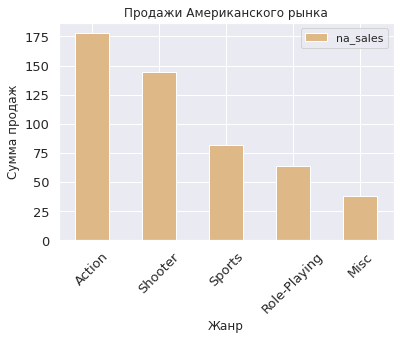

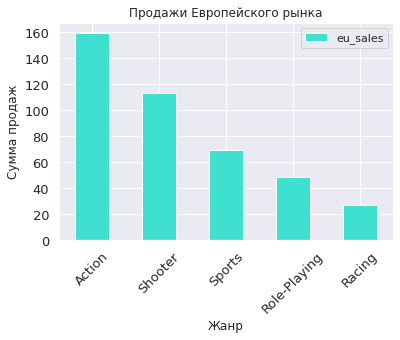

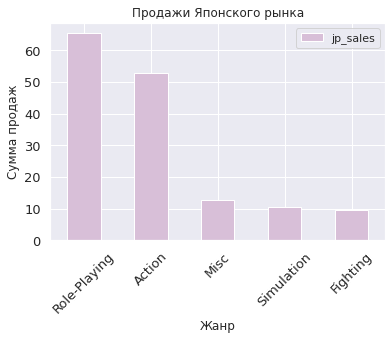

In [63]:
new_top.groupby('genre').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False)[:5].plot(kind='bar', color='burlywood', fontsize=13, rot=45)
plt.title('Продажи Американского рынка')
plt.xlabel('Жанр')
plt.ylabel('Сумма продаж')
plt.show()

new_top.groupby('genre').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False)[:5].plot(kind='bar', color='turquoise', fontsize=13, rot=45)
plt.title('Продажи Европейского рынка')
plt.xlabel('Жанр')
plt.ylabel('Сумма продаж')
plt.show()

new_top.groupby('genre').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False)[:5].plot(kind='bar', color='thistle', fontsize=13, rot=45)
plt.title('Продажи Японского рынка')
plt.xlabel('Жанр')
plt.ylabel('Сумма продаж')
plt.show()

Вкусы в Северной Америке и Европе схожи: и там, и там живут фанаты экшнов, шутеров и спортивных игр. 


В Японии вкус совершенно иной - на первом месте ролевые игры, далее экшны и misc(прочее)

В распределении долей рынка по жанрам у пользователей Америки и Европы вкусы совпадают по первым 4 пунктам из ТОП5: Action >  Shooters > Sports > Role_playing. На пятой строчке в Европе - Racing, в то время как у жителей Северной Америки - Misc.

У японцев все иначе: Role-Playing > Action > Misc > Simulation > Fighting.

Если подвести итоги, то:

- в Северной Америке самая большая доля рынка от глобальных продаж, за лидирующую платформу борятся Sony и Microsotf, но конкрурент местного производителя все же немного отстает;
- Европа второй по величине рынок. Абсолютным лидером среди платформ является Sony Playstation. Европа и Северная Америка похожи по предпочтениям, главные жанры Action, Shooter, Sports и RPG;
- Япония занимает третье место по продажам. Рынок не похож на другие: местные производители целиком и полностью доминируют по продажам; в жанровых препочтениях, Япония – единственный рынок, где предобладает RPG.

##### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [64]:
new_top.pivot_table(
    index='rating', 
    values=['na_sales', 'eu_sales', 'jp_sales'], 
    aggfunc='sum'
).apply(lambda col: col / col.sum(), axis=0).style.format("{:.1%}")

,eu_sales,jp_sales,na_sales
rating,,,
E,22.3%,14.7%,19.4%
E10+,10.9%,4.3%,12.8%
M,38.3%,11.0%,39.2%
T,10.4%,13.5%,11.2%
unrated,18.1%,56.5%,17.5%


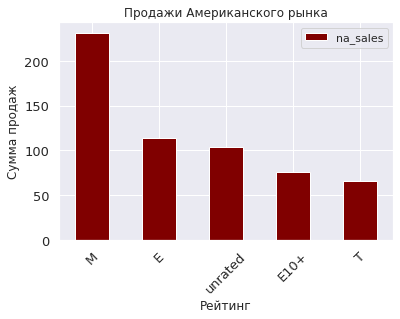

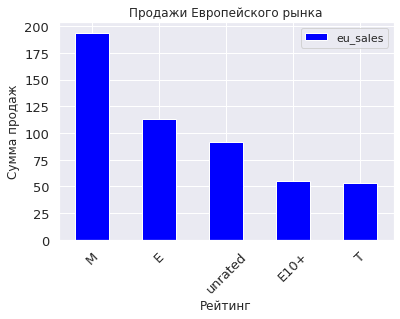

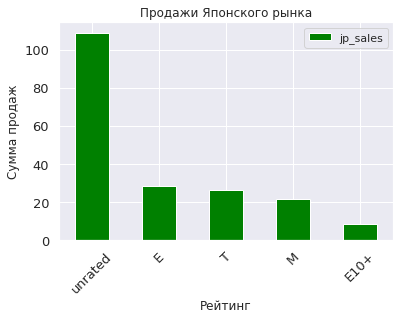

In [66]:
new_top.groupby('rating').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False)[:5].plot(kind='bar', color='maroon', fontsize=13, rot=45)
plt.title('Продажи Американского рынка')
plt.xlabel('Рейтинг')
plt.ylabel('Сумма продаж')
plt.show()

new_top.groupby('rating').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False)[:5].plot(kind='bar', color='blue', fontsize=13, rot=45)
plt.title('Продажи Европейского рынка')
plt.xlabel('Рейтинг')
plt.ylabel('Сумма продаж')
plt.show()

new_top.groupby('rating').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False)[:5].plot(kind='bar', color='green', fontsize=13, rot=45)
plt.title('Продажи Японского рынка')
plt.xlabel('Рейтинг')
plt.ylabel('Сумма продаж')
plt.show()

Судя по графику, рейтинг ERSB пришел в Японию намного позже, либо вовсе у них своя система проставления возрастных ограничений, больше половины - игры без рейтинга.
Европа и Америка предпичитают игры с рейтингом E.

Исходя из наших данных, больше всего продаж игр с возрастными рейтингами:
    
    Для Японского сегмента рынка:
    С существенным перевесом преобладают игры без рейтинга, предположительно, что в японии имеется своя система градации игр по возрастному ограничению, либо, систему ESRB они приняли совсем недавно.
    
    Для Европейского и Американского рынков:
    «M» («Mature») — «Для взрослых»: Содержание вполне подходит для всех возрастов. Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера.
    
Наименее продаваемые игры с возрастным рейтингом:
    
    Для Японского сегмента рынка:
    «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови.
    
    Для Американского и Европейского рынка это:
    «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики.

## Проверьте гипотезы

##### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Сформируем гипотезы:
    
    H0 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
    H1 - Средние пользовательские рейтинги платформ Xbox One и PC отличаются

In [68]:
xone = new_top.query('platform == "XOne"').dropna().reset_index(drop=True)
pc = new_top.query('platform == "PC"').dropna().reset_index(drop=True)

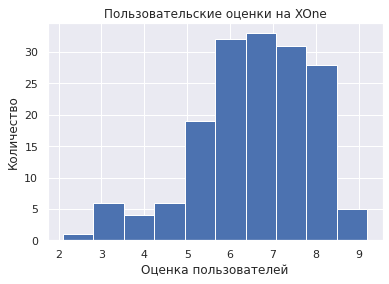

In [69]:
xone['user_score'].hist()
plt.xlabel('Оценка пользователей')
plt.ylabel('Количество')
plt.title('Пользовательские оценки на XOne')
plt.show()

In [70]:
xone['user_score'].describe()

count    165.000000
mean       6.538182
std        1.340298
min        2.100000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

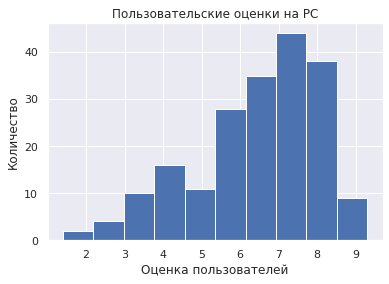

In [71]:
pc['user_score'].hist()
plt.xlabel('Оценка пользователей')
plt.ylabel('Количество')
plt.title('Пользовательские оценки на PC')
plt.show()

In [72]:
pc['user_score'].describe()

count    197.000000
mean       6.454315
std        1.639451
min        1.400000
25%        5.500000
50%        6.800000
75%        7.700000
max        9.300000
Name: user_score, dtype: float64

У нас разные по размеру выборки, отзывов пользователей PC в четыре раза больше, чем пользователей платформы XOne. Для подтверждения гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам иcпользуется метод st.stats.ttest_ind, так же мы будем использовать параметр equal_var=False, т.к. есть сомнения по разночначности выборок.

Распределения похожи на нормальные, оценок на PC намного больше. Глядя на графики, кажется, что оценки все таки отличаются.

In [73]:
alpha = 0.05 

results = st.stats.ttest_ind(xone['user_score'], pc['user_score'], equal_var=False)
print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение:  0.5926561176517491
Не получилось отвергнуть нулевую гипотезу


/tmp/ipykernel_323/3488529614.py:3: DeprecationWarning: Please use `ttest_ind` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  results = st.stats.ttest_ind(xone['user_score'], pc['user_score'], equal_var=False)


Видимо, средние знчения пользовательский оценок XOne и PC все таки отличаются.

По результатам теста, не отвергаем нулевую гипотезу о том, что Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

##### Средние пользовательские рейтинги жанров Action и Sports разные.

Сформируем гипотезы:
    
    H0 - Средние пользовательские рейтинги жанров Action и Sports одинаковые
    H1 - Средние пользовательские рейтинги жанров Action и Sports разные

In [74]:
action = new_top.query('genre == "Action"').dropna().reset_index(drop=True)
sports = new_top.query('genre == "Sports"').dropna().reset_index(drop=True)

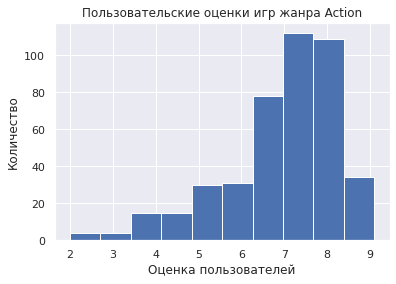

In [75]:
action['user_score'].hist()
plt.xlabel('Оценка пользователей')
plt.ylabel('Количество')
plt.title('Пользовательские оценки игр жанра Action')
plt.show()

In [76]:
action['user_score'].describe()

count    432.000000
mean       6.899306
std        1.323507
min        2.000000
25%        6.300000
50%        7.300000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64

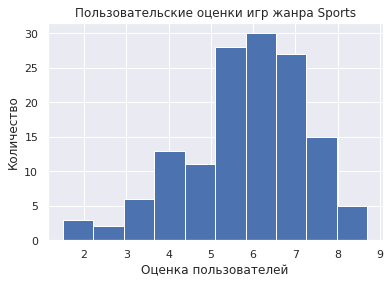

In [77]:
sports['user_score'].hist()
plt.xlabel('Оценка пользователей')
plt.ylabel('Количество')
plt.title('Пользовательские оценки игр жанра Sports')
plt.show()

In [78]:
sports['user_score'].describe()

count    140.000000
mean       5.822143
std        1.414014
min        1.500000
25%        5.075000
50%        6.000000
75%        6.800000
max        8.700000
Name: user_score, dtype: float64

У нас снова разные по размеру выборки, оценок в жанре Action в три раза больше. Для подтверждения гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам иcпользуется метод st.stats.ttest_ind, так же мы будем использовать параметр equal_var=False, т.к. есть сомнения по равнозначности выборок.

Здесь наблюдаем, что графики очень похожи друг на друга, однако, оценок жанра Action явно больше. Проверим наши гипотезы.

In [79]:
alpha = 0.05 

results = st.stats.ttest_ind(action['user_score'], sports['user_score'], equal_var=False)
print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение:  8.926417011727624e-14
Отвергаем нулевую гипотезу


/tmp/ipykernel_323/3977798876.py:3: DeprecationWarning: Please use `ttest_ind` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  results = st.stats.ttest_ind(action['user_score'], sports['user_score'], equal_var=False)


Результаты теста нам свидетельствуют, что все же статистически значимсая разница между пользовательскими оценками жанров Action и Sports есть, поэтому мы отвергаем нулевую гипотезу.

## Напишите общий вывод

В рамках сборного проекта мы рассмотрели и изучили данные интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры.
На стадии предобработки данных мы избавились от 269 строк с пропусками в столбце year_of_release, заменили значения tbd в столбце user_score на Nan. Скорретировали типы данных столбцов user_score и year_of_release. 
Посчитали суммарную продажу игр по всем региоанам, и записали ее в столбце total_sale. Далее мы избавились от явных дубликатов, после чего приступили к исследовательскому анализу.

Мы расчитали количество релизов игр по годам, и отбросили данные до 1995 года. Далее, мы нашли Суммарные продажи по платформам, и выявили 6 лидеров за всю историю, по убванию - PS2, X360, PS3, Wii, DS, PS.

Далее, мы нашли цикл появления новых и исчезновения старых платформ, который составил около 10 лет. Основываясь на этом, мы определили самые перспективные игровые платформы - Sony PlayStation 4 и Xbox One. 

После, мы занялись анализом влияния отзывов на продажи видеоигр, расчеты производили на основе данных по PS4, XOne и 3DS. Как выяснилось, отзывы пользователей совсем не влияют на показатели продаж видеоигр, отзывы критиков имеют свзяь с уровнем продаж, но совсем незначительную. 

Наши расчеты говорят, что Европейский регион предпочитает играть на PS, больше 50% пользуются PS3 либо PS4. А вот Япония, делает 57% продаж на 3DS и еще 33% отдают PS3 и PS4, явные патриоты своего продукта. В Серевной Америке бьются за лидерство Sony и Microsoft - 43.3% предпочитают XBox, 39.4% - Sony PlayStation. Продажи на WiiU по всем регионам не превышает 9%.

В распределении долей рынка по жанрам у пользователей Америки и Европы вкусы совпадают по первым  трем пунктам из ТОП5: Action > Shooters > Sports > RPG
А вот на пятой строчке в Европе - Racing, в то время как у жителей Северной Америки - Misc.
У японцев все иначе: Role-Playing > Action > Sports > Platform и Misc.
Если подвести итоги, то:
- в Северной Америке самая большая доля рынка от глобальных продаж, за лидирующую платформу борятся Sony и Microsotf, но конкрурент местного производителя все же немного отстает;
- Европа второй по величине рынок. Абсолютным лидером среди платформ является Sony Playstation. Европа и Северная Америка похожи по предпочтениям, главные жанры Action, Shooter и Sports;
- Япония занимает третье место по продажам. Рынок не похож на другие: местные производители целиком и полностью доминируют по продажам; в жанровых препочтениях Япония – единственный рынок, где предобладает RPG.

Исходя из наших данных, больше всего продаж игр с возрастными рейтингами:

Для Японского сегмента рынка (если не считать игры без рейтинга):
- «E» («Everyone») — «Для всех»: Содержание вполне подходит для всех возрастов. Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера.
Для Европейского и Американского рынков:
- «M» («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет. Проекты с данным рейтингом могут содержать жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику.

Наименее продаваемые игры с возрастным рейтингом:
Для Японского сегмента рынка:
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови.
Для Европейского и Американского рынков:
- «E10+» и «T» имеют очень близкие значения
«T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики.

В результате нашего исследования мы отклонили гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. И не отвергли гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports одинаковые.

Подводя итог нашей работы, можно рекомендовать интернет-магазину «Стримчик» строить разные рекламные компании для рынков NA/EU и JP. Если Европейский и Американский еще находят точки соприкосновения, то Японский сильно отличается, а именно:

Для рекламы в Американском регионе:
- акцент стоит делать на платформу XBox - в первую очередь, далее на PS.
- игры жанров Action, Sports, Shooters, Platform и Misc являются наиболее популярыными у американцев, следовательно, лучше заложить больший бюджет на релизы, которые будут подходить под эти параметры.
  
Для рекламы в Европейском регионе:
- тут особое внимание необходимо уделить пользователям PS, т.к. их количество явно преобладает. 
- популярностью пользуются игры жанров Action, Sports, Shooters, Racing и Misc. Наверное, самый правильный совет будет - не жалеть деньги на релизы эксклюзивов для Sony Playstation в перечисленных жанрах игр.
  
Реклама в Японском регионе:
- здесь все внимание и львиная доля бюджета для юзеров 3DS, а оставшееся можно выделить на рекламу для PS.
- самые популярные жанры в Японском регионе Role-Playing, Action, Sports, Platform и Misc.
Исследование показало, что чаще пользуются популярностью игры с рейтингом «E» («Everyone») — «Для всех», применимо ко всем регионам.